# Heterogeneity Metric 

It's a metric for unsupurvised learning to compute the relation distance between each datapoint for each cluster, 
after training a model using KMeans or any other algorithm compute the distance between the articles in each cluster to their centroid of the cluster and sum all of this distance, iterate this operation for each cluster and sum all the heterogeneity for all clusters then the result will be the heterogeneity metric.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import pairwise_distances_argmin, euclidean_distances , pairwise_distances
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np

In [4]:
dataset= pd.read_csv('Dataset/KO_data.csv')

In [5]:
tfidfvec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidfvec.fit_transform(dataset['text'])

## Choosing No. of clusters

Using the heterogeneity metric to know the suitable k to be used preveting the overfitting and also the irrelevant articles in clusters.

In [6]:
def compute_heterogeneity(model,tfidf_matrix):
    centers= model.cluster_centers_
    model_labels = pairwise_distances_argmin(tfidf_matrix,centers)
    heterogeneity=0
    for i,j in enumerate(set(model_labels)):
        positions=tfidf_matrix[np.where(model_labels == i)]
        output=sum(euclidean_distances(positions,centers[j].reshape(1,-1)))
        heterogeneity+=output
        #print('cluster {} has a  heterogeneity of {}'.format(i,output))
    return heterogeneity

In [15]:
def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
    plt.figure(figsize=(7,4))
    plt.plot(k_values, heterogeneity_values, linewidth=4)
    plt.xlabel('K_values')
    plt.ylabel('Heterogeneity')
    plt.title('K vs. Heterogeneity')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

#### Plotting graph K vs. Heterogeneity
Plot a graph between the K values (no. of clusters) and the heterogeneity of each model, <b>choose the elbow of the graph</b> to be the best value for k.

[ 1371.90089673]
[ 1352.00511119]
[ 1314.51244913]
[ 1290.60227776]
[ 1234.77945616]


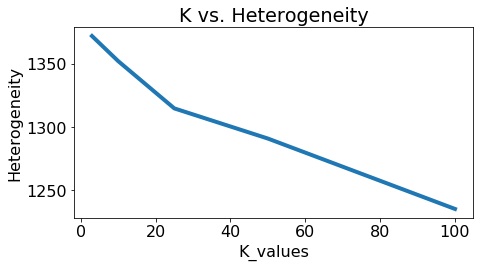

In [16]:
k_list = [3, 10, 25, 50, 100]
heterogeneity_values = []
for k in k_list:
    model_kmeans= KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    model_kmeans.fit(tfidf_matrix)
    hetero= compute_heterogeneity(model_kmeans,tfidf_matrix)
    print hetero
    heterogeneity_values.append(hetero)
plot_k_vs_heterogeneity(k_list, heterogeneity_values)

## Testing data and visualize words for each cluster

In [10]:
model= KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model.fit(tfidf_matrix)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvec.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:  product  team  people  customers  customer  company  time  users  work  new
Cluster 1:  data  netflix  time  like  people  code  new  use  companies  business
Cluster 2:  design  designers  designer  ux  product  team  work  user  sprint  users


In [11]:
test_dataset= pd.read_csv('KO_articles_test.csv')

In [12]:
test_business = test_dataset[test_dataset['category']=='business']
test_engineering = test_dataset[test_dataset['category']=='engineering']
test_product = test_dataset[test_dataset['category']=='product']

In [13]:
print("\nBusiness category Predictions on test set")

Y = tfidfvec.transform(test_business['text'])
prediction = model.predict(Y)
print(prediction)

print("\nEngineering category Predictions on test set")

Y = tfidfvec.transform(test_engineering['text'])
prediction = model.predict(Y)
print(prediction)

print("\nProduct category Predictions on test set")

Y = tfidfvec.transform(test_product['text'])
prediction = model.predict(Y)
print(prediction)


Business category Predictions on test set
[0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0]

Engineering category Predictions on test set
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]

Product category Predictions on test set
[0 1 2 0 0 1 0 2 1 2 2 0 0 2 1 0 0 2 1 0 0 0 2]
